In [183]:
import pandas as pd
import numpy as ny
from datetime import datetime  
from dateutil.parser import parse
from pytz import timezone
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
# Import master_df_cleaned.csv as a dataframe
df = pd.read_csv('master_df_cleaned-no_col.csv')

In [185]:
df.info

<bound method DataFrame.info of                 Unnamed: 0  Actual frequency  FCR Requested  System imbalance  \
0      2023-05-07 21:45:00            50.012          -5.28          -152.097   
1      2023-05-07 21:30:00            50.019          -8.36            61.252   
2      2023-05-07 21:15:00            49.979           9.24          -383.707   
3      2023-05-07 21:00:00            49.999           0.44           151.160   
4      2023-05-07 20:45:00            50.028         -12.32             8.050   
...                    ...               ...            ...               ...   
18039  2022-11-01 00:00:00            50.016          -6.88           160.017   
18040  2022-10-31 23:45:00            50.015          -6.45           309.890   
18041  2022-10-31 23:30:00            49.991           3.87          -274.545   
18042  2022-10-31 23:15:00            50.000           0.00           -16.578   
18043  2022-10-31 23:00:00            50.016          -6.88           373.608

In [186]:
# List all column names in the dataframe
df.columns

Index(['Unnamed: 0', 'Actual frequency', 'FCR Requested', 'System imbalance',
       'Net regulation volume', 'GUV', 'IGCC+', 'aFRR+', 'GDV', 'IGCC-',
       'aFRR-', 'Total', 'Alpha', 'Marginal incremental price',
       'Marginal decremental price', 'Positive imbalance price',
       'Negative imbalance price', 'Measured & Upscaled', 'Monitored capacity',
       'Load factor', 'Total Load', 'wp_Measured & Upscaled',
       'wp_Monitored capacity', 'wp_Load factor', 'weath_air_temperature',
       'weath_precipitation', 'weath_wind_speed', 'weath_wind_direction'],
      dtype='object')

In [187]:
# Set the first column as the index in a datetime format
df.index = pd.to_datetime(df.iloc[:, 0])


In [188]:
df

,Unnamed: 0,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,...,Monitored capacity,Load factor,Total Load,wp_Measured & Upscaled,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2023-05-07 21:45:00,2023-05-07 21:45:00,50.012,-5.28,-152.097,140.360,140.360,135.757,4.603,0.000,0.000,...,22286.424,0.0,7994.16,33.53,5211.99,0.03,13.5450,0.0,1.5700,304.250
2023-05-07 21:30:00,2023-05-07 21:30:00,50.019,-8.36,61.252,-164.432,0.630,0.630,0.000,165.062,38.120,...,22286.424,0.0,7914.45,29.33,5211.99,0.02,13.5675,0.0,1.4075,148.350
2023-05-07 21:15:00,2023-05-07 21:15:00,49.979,9.24,-383.707,295.043,295.043,64.350,108.593,0.000,0.000,...,22286.424,0.0,8096.30,27.18,5211.99,0.02,13.5300,0.0,1.7950,148.650
2023-05-07 21:00:00,2023-05-07 21:00:00,49.999,0.44,151.160,-149.294,0.000,0.000,0.000,149.294,123.344,...,22286.424,0.0,8187.23,27.62,5211.99,0.02,13.4775,0.0,1.8500,236.950
2023-05-07 20:45:00,2023-05-07 20:45:00,50.028,-12.32,8.050,-2.151,75.000,0.000,0.000,77.151,72.559,...,22286.424,0.0,8201.35,30.88,5211.99,0.03,13.4800,0.0,1.9050,154.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 00:00:00,2022-11-01 00:00:00,50.016,-6.88,160.017,-138.693,0.000,0.000,0.000,138.693,128.323,...,18545.413,0.0,7022.95,3858.28,5041.05,3.31,15.9050,0.0,8.7100,177.200
2022-10-31 23:45:00,2022-10-31 23:45:00,50.015,-6.45,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,...,18545.413,0.0,6987.90,3905.52,5041.05,3.39,15.7650,0.0,8.0800,175.050
2022-10-31 23:30:00,2022-10-31 23:30:00,49.991,3.87,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,...,18545.413,0.0,7238.46,3897.11,5041.05,3.37,15.6725,0.0,8.0225,173.750


In [189]:
# Delete the first column
df = df.drop(df.columns[0], axis=1)

In [190]:
df.head()

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,Monitored capacity,Load factor,Total Load,wp_Measured & Upscaled,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2023-05-07 21:45:00,50.012,-5.28,-152.097,140.360,140.360,135.757,4.603,0.000,0.000,0.000,...,22286.424,0.0,7994.16,33.53,5211.99,0.03,13.5450,0.0,1.5700,304.25
2023-05-07 21:30:00,50.019,-8.36,61.252,-164.432,0.630,0.630,0.000,165.062,38.120,126.942,...,22286.424,0.0,7914.45,29.33,5211.99,0.02,13.5675,0.0,1.4075,148.35
2023-05-07 21:15:00,49.979,9.24,-383.707,295.043,295.043,64.350,108.593,0.000,0.000,0.000,...,22286.424,0.0,8096.30,27.18,5211.99,0.02,13.5300,0.0,1.7950,148.65
2023-05-07 21:00:00,49.999,0.44,151.160,-149.294,0.000,0.000,0.000,149.294,123.344,25.950,...,22286.424,0.0,8187.23,27.62,5211.99,0.02,13.4775,0.0,1.8500,236.95
2023-05-07 20:45:00,50.028,-12.32,8.050,-2.151,75.000,0.000,0.000,77.151,72.559,4.592,...,22286.424,0.0,8201.35,30.88,5211.99,0.03,13.4800,0.0,1.9050,154.70


In [191]:
df.tail()

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,Monitored capacity,Load factor,Total Load,wp_Measured & Upscaled,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2022-11-01 00:00:00,50.016,-6.88,160.017,-138.693,0.000,0.000,0.000,138.693,128.323,10.370,...,18545.413,0.0,7022.95,3858.28,5041.05,3.31,15.9050,0.0,8.7100,177.200
2022-10-31 23:45:00,50.015,-6.45,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,39.733,...,18545.413,0.0,6987.90,3905.52,5041.05,3.39,15.7650,0.0,8.0800,175.050
2022-10-31 23:30:00,49.991,3.87,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,0.000,...,18545.413,0.0,7238.46,3897.11,5041.05,3.37,15.6725,0.0,8.0225,173.750
2022-10-31 23:15:00,50.000,0.00,-16.578,34.556,134.556,15.676,118.880,100.000,0.000,0.000,...,18545.413,0.0,7428.68,3857.75,5041.05,3.32,15.7200,0.0,8.4950,172.600
2022-10-31 23:00:00,50.016,-6.88,373.608,-394.779,26.397,26.397,0.000,421.176,16.204,4.972,...,18545.413,0.0,7507.48,3898.73,5041.05,3.40,15.7100,0.0,8.2150,169.575


In [192]:
# Rename the index column to Datetime
df.index.name = 'Datetime'

# Autocorrelation Analysis

In [193]:
from statsmodels.graphics.tsaplots import plot_acf


In [194]:
# Get column names in the dataframe
df.columns

Index(['Actual frequency', 'FCR Requested', 'System imbalance',
       'Net regulation volume', 'GUV', 'IGCC+', 'aFRR+', 'GDV', 'IGCC-',
       'aFRR-', 'Total', 'Alpha', 'Marginal incremental price',
       'Marginal decremental price', 'Positive imbalance price',
       'Negative imbalance price', 'Measured & Upscaled', 'Monitored capacity',
       'Load factor', 'Total Load', 'wp_Measured & Upscaled',
       'wp_Monitored capacity', 'wp_Load factor', 'weath_air_temperature',
       'weath_precipitation', 'weath_wind_speed', 'weath_wind_direction'],
      dtype='object')

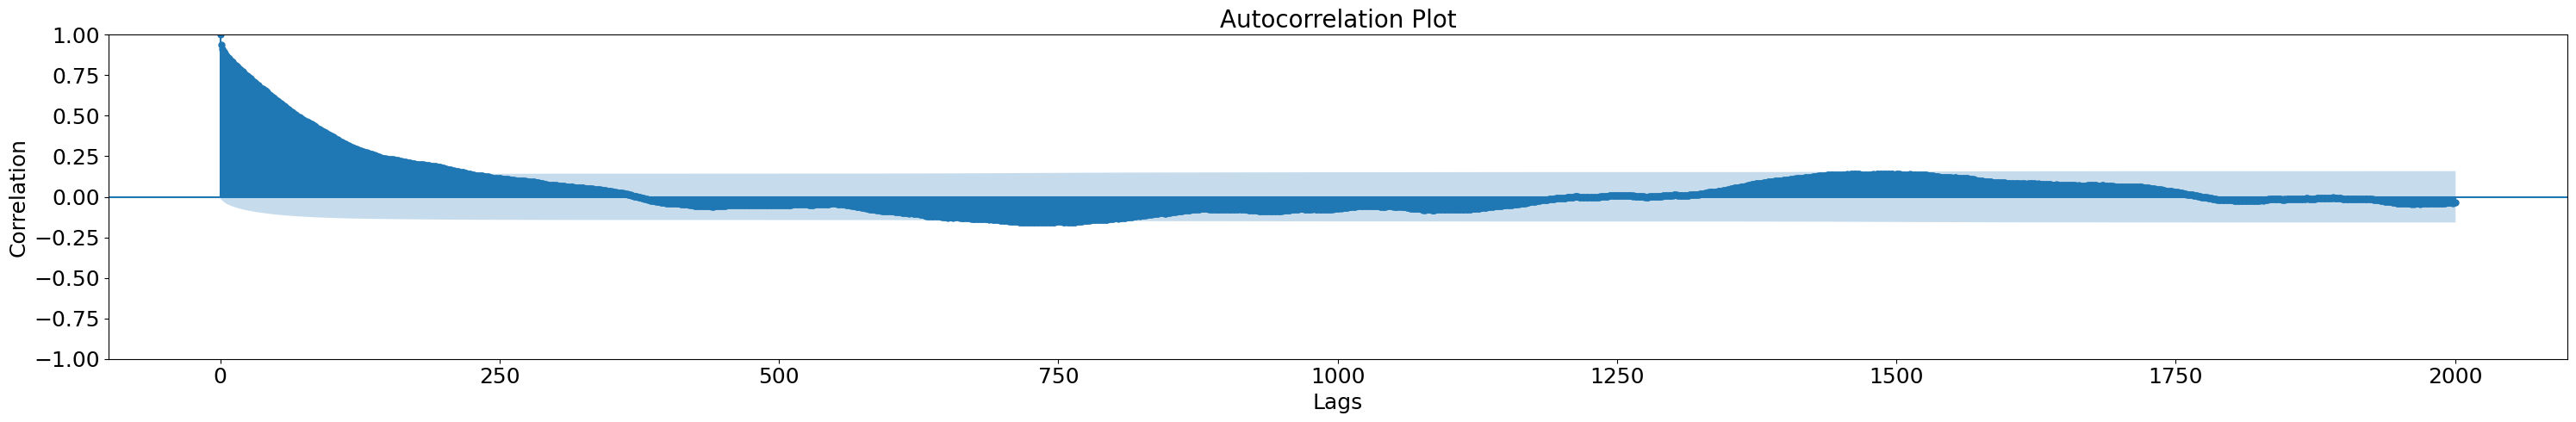

In [195]:
plt.rc("figure", figsize=(30,5))
plot_acf(df['weath_wind_direction'], lags=2000)
plt.ylim(-1,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

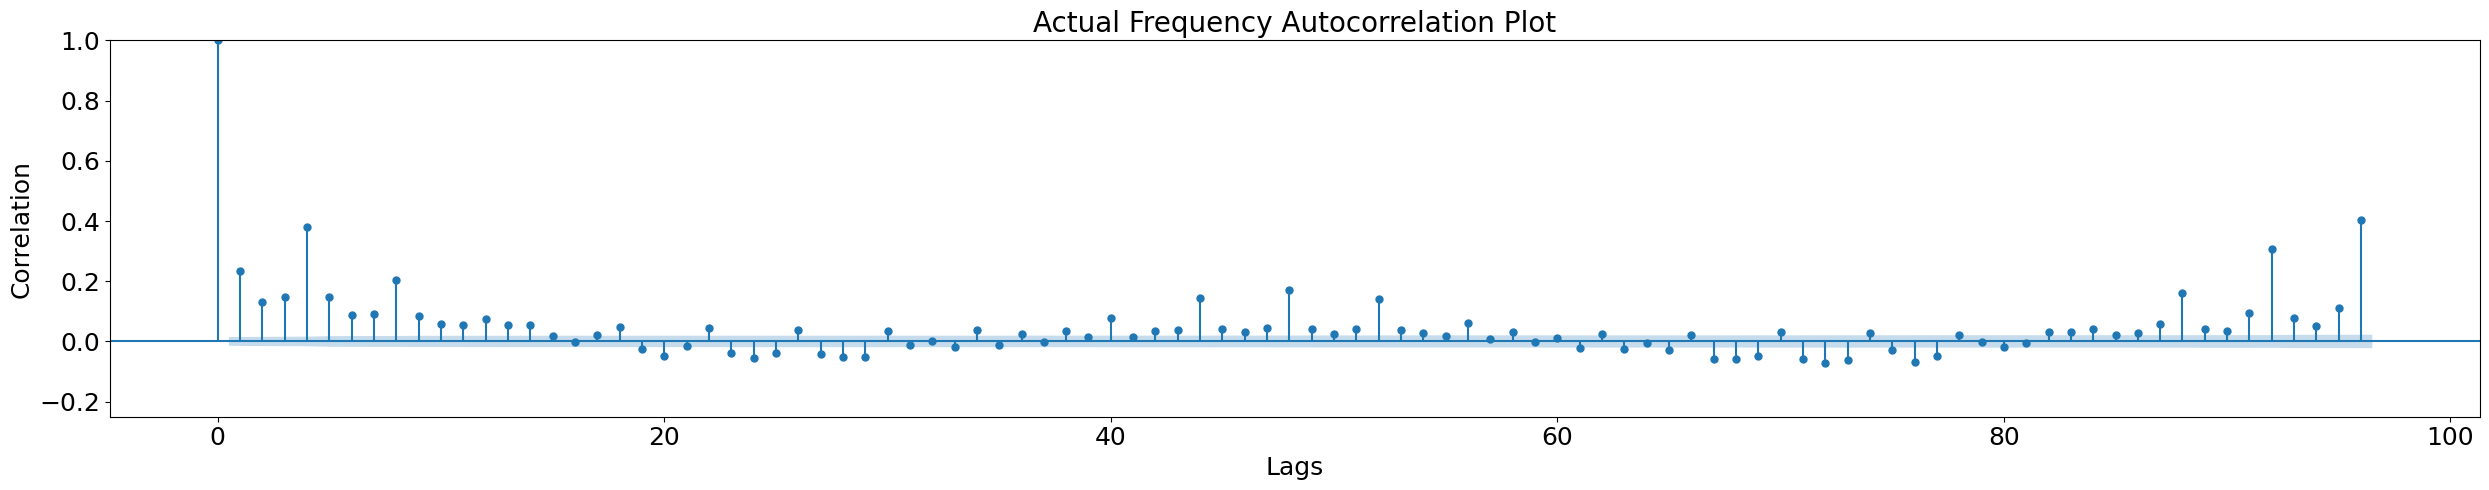

In [196]:
plt.rc("figure", figsize=(25,5))
plot_acf(df['Actual frequency'], lags=96)
plt.ylim(-0.25,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Actual Frequency Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

## How to read this?
The blue shaded region is the confidence interval with a default value of α = 0.05. Anything within this range represents a value that has no significant correlation

The vertical lines with markers at their tops are the “lags” that represent a specific number (37, in this case because of the number of weeks) of previous values. These represent the correlation value (shown on the y-axis) and diminish at a steady rate as their proximity from the current price increases.

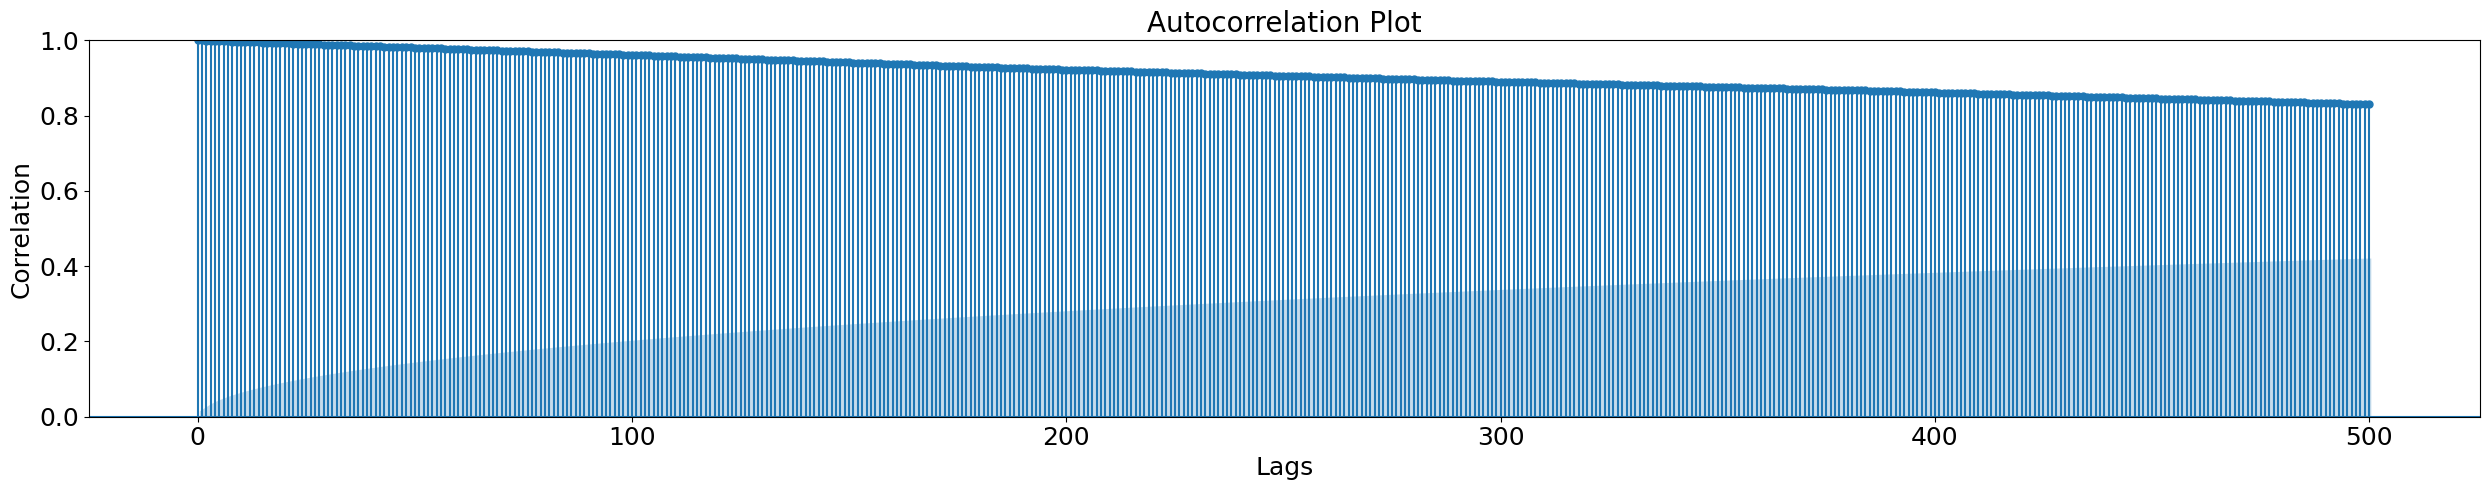

In [197]:
plt.rc("figure", figsize=(25,5))
plot_acf(df['Total'], lags=500)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

Total needs to be omitted for sure, it is an introduction of a constant

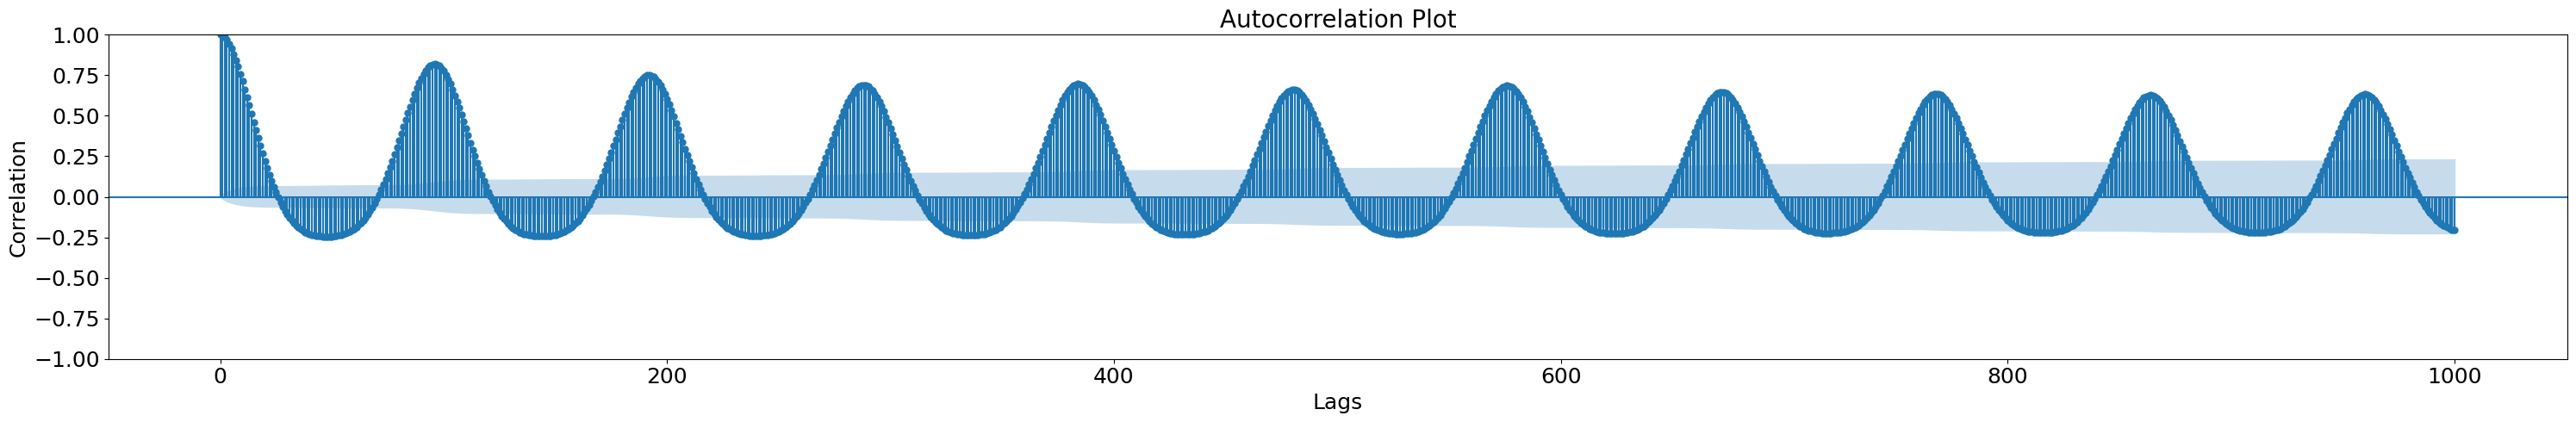

In [198]:
plt.rc("figure", figsize=(30,5))
plot_acf(df['Measured & Upscaled'], lags=1000)
plt.ylim(-1,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

Something to ask Yashar whether to omit it or not

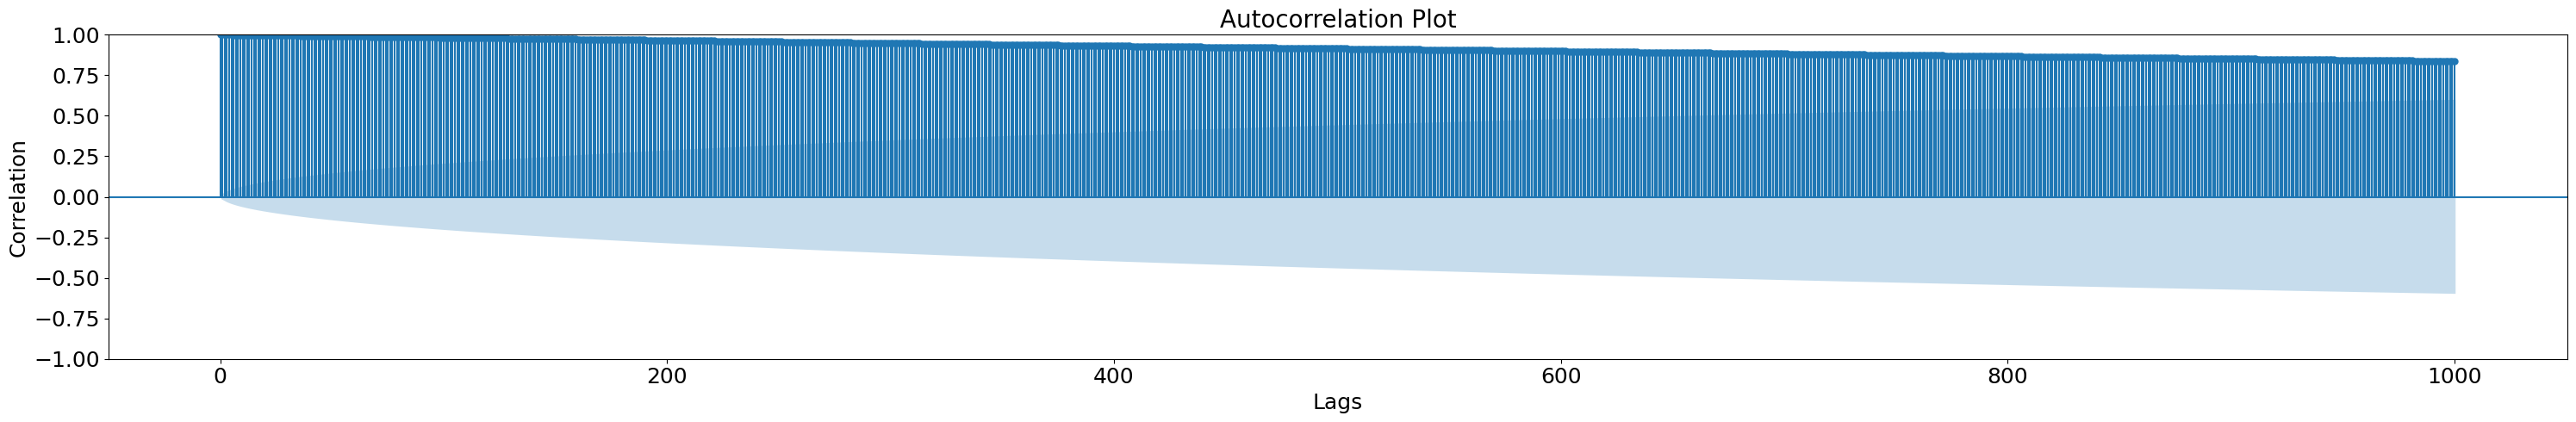

In [199]:
plt.rc("figure", figsize=(30,5))
plot_acf(df['Monitored capacity'], lags=1000)
plt.ylim(-1,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

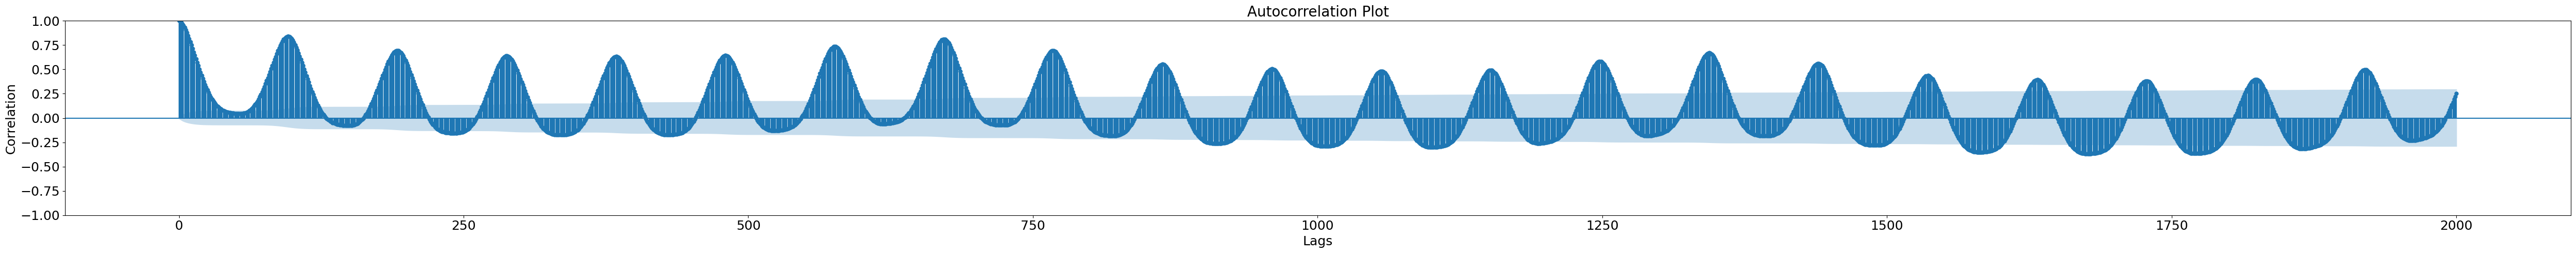

In [200]:
plt.rc("figure", figsize=(50,5))
plot_acf(df['Total Load'], lags=2000)
plt.ylim(-1,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

# Normalization

Min-max scaling steps
1. Split the data into test and train parts
2. Apply min-max scaling from -1 to 1
3. Create X_train, Y_train, X_test, Y_test
4. Convert into matrices

# Feature Engineering and Data Splitting

In [201]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actual frequency,18044.0,50.001593,0.020458,49.875,49.987000,50.00300,50.01600,50.095
FCR Requested,18044.0,-0.695332,8.948207,-41.800,-6.880000,-1.29000,5.59000,55.000
System imbalance,18044.0,-13.274181,207.248432,-1282.136,-131.409250,-9.42400,111.32350,1210.216
Net regulation volume,18044.0,13.399773,178.864846,-1141.483,-89.849000,8.05350,112.03425,1108.754
GUV,18044.0,87.706228,118.568856,0.000,0.153750,39.32650,134.94425,1114.579
IGCC+,18044.0,36.672182,65.314898,0.000,0.000000,3.40650,46.65700,718.871
aFRR+,18044.0,17.048799,31.984912,0.000,0.000000,0.56750,15.54775,204.527
GDV,18044.0,74.306455,104.307765,0.000,0.074750,28.13200,114.80250,1141.483
IGCC-,18044.0,40.094627,67.613132,0.000,0.000000,6.53550,54.10975,861.426
aFRR-,18044.0,20.008043,40.560677,0.000,0.000000,0.75200,18.41650,382.141


In [202]:
# Sort the df in descending order
df = df.sort_index(ascending=True)

df.head()

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,Monitored capacity,Load factor,Total Load,wp_Measured & Upscaled,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-31 23:00:00,50.016,-6.88,373.608,-394.779,26.397,26.397,0.000,421.176,16.204,4.972,...,18545.413,0.0,7507.48,3898.73,5041.05,3.40,15.7100,0.0,8.2150,169.575
2022-10-31 23:15:00,50.000,0.00,-16.578,34.556,134.556,15.676,118.880,100.000,0.000,0.000,...,18545.413,0.0,7428.68,3857.75,5041.05,3.32,15.7200,0.0,8.4950,172.600
2022-10-31 23:30:00,49.991,3.87,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,0.000,...,18545.413,0.0,7238.46,3897.11,5041.05,3.37,15.6725,0.0,8.0225,173.750
2022-10-31 23:45:00,50.015,-6.45,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,39.733,...,18545.413,0.0,6987.90,3905.52,5041.05,3.39,15.7650,0.0,8.0800,175.050
2022-11-01 00:00:00,50.016,-6.88,160.017,-138.693,0.000,0.000,0.000,138.693,128.323,10.370,...,18545.413,0.0,7022.95,3858.28,5041.05,3.31,15.9050,0.0,8.7100,177.200


In [203]:
df.index = pd.to_datetime(df.index)


In [204]:
date_range = list(pd.date_range(df.index.min(), df.index.max(), freq='15Min'))
print(len(date_range))

18044


In [205]:
timestamp_s = pd.to_datetime(df.index).map(datetime.timestamp)

df.head()

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,Monitored capacity,Load factor,Total Load,wp_Measured & Upscaled,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-31 23:00:00,50.016,-6.88,373.608,-394.779,26.397,26.397,0.000,421.176,16.204,4.972,...,18545.413,0.0,7507.48,3898.73,5041.05,3.40,15.7100,0.0,8.2150,169.575
2022-10-31 23:15:00,50.000,0.00,-16.578,34.556,134.556,15.676,118.880,100.000,0.000,0.000,...,18545.413,0.0,7428.68,3857.75,5041.05,3.32,15.7200,0.0,8.4950,172.600
2022-10-31 23:30:00,49.991,3.87,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,0.000,...,18545.413,0.0,7238.46,3897.11,5041.05,3.37,15.6725,0.0,8.0225,173.750
2022-10-31 23:45:00,50.015,-6.45,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,39.733,...,18545.413,0.0,6987.90,3905.52,5041.05,3.39,15.7650,0.0,8.0800,175.050
2022-11-01 00:00:00,50.016,-6.88,160.017,-138.693,0.000,0.000,0.000,138.693,128.323,10.370,...,18545.413,0.0,7022.95,3858.28,5041.05,3.31,15.9050,0.0,8.7100,177.200


In [206]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')


# Multicollinearity test

In [207]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# Deduct 50 from all values in the column 'Actual frequency'
df['Actual frequency'] = df['Actual frequency'] - 50

In [209]:
# Rename the column 'Actual frequency' to 'Actual frequency deviation'
df.rename(columns={'Actual frequency': 'Actual frequency deviation'}, inplace=True)

In [210]:
y = df['Actual frequency deviation']
X = df.drop(['Actual frequency deviation'], axis=1)

X = sm.add_constant(X)

In [211]:
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [212]:
# VIF values greater than 5 or 10 indicate high multicollinearity
# Examine the VIF values and identify any variables with high VIF

# Example:
high_vif_variables = vif[vif['VIF'] > 10]['Variable']
print(high_vif_variables)

0                        const
2             System imbalance
3        Net regulation volume
4                          GUV
7                          GDV
14    Positive imbalance price
15    Negative imbalance price
16         Measured & Upscaled
18                 Load factor
20      wp_Measured & Upscaled
22              wp_Load factor
Name: Variable, dtype: object


In [213]:
# Show the VIF values
vif

,Variable,VIF
0,const,1.107420e+04
1,FCR Requested,1.186068e+00
2,System imbalance,1.020654e+01
3,Net regulation volume,7.560181e+11
4,GUV,3.322219e+11
5,IGCC+,2.233327e+00
6,aFRR+,1.621002e+00
7,GDV,2.571135e+11
8,IGCC-,3.263451e+00
9,aFRR-,2.044660e+00


In [214]:
df.columns

Index(['Actual frequency deviation', 'FCR Requested', 'System imbalance',
       'Net regulation volume', 'GUV', 'IGCC+', 'aFRR+', 'GDV', 'IGCC-',
       'aFRR-', 'Total', 'Alpha', 'Marginal incremental price',
       'Marginal decremental price', 'Positive imbalance price',
       'Negative imbalance price', 'Measured & Upscaled', 'Monitored capacity',
       'Load factor', 'Total Load', 'wp_Measured & Upscaled',
       'wp_Monitored capacity', 'wp_Load factor', 'weath_air_temperature',
       'weath_precipitation', 'weath_wind_speed', 'weath_wind_direction'],
      dtype='object')

In [215]:
# Drop 'System imbalance', 'Net regulation volume', 'GUV', 'GDV', 'Positive imbalance price', 'Negative imbalance price', 'Measured & Upscaled', 'Load factor', 'wp_Measured & Upscaled', and 'wp_Load factor' columns
df = df.drop(['System imbalance', 'GUV', 'GDV', 'Positive imbalance price', 'Negative imbalance price', 'Measured & Upscaled', 'wp_Measured & Upscaled'], axis=1)


In [216]:
correlation_matrix = df.corr()

In [217]:
correlation_matrix

,Actual frequency deviation,FCR Requested,Net regulation volume,IGCC+,aFRR+,IGCC-,aFRR-,Total,Alpha,Marginal incremental price,Marginal decremental price,Monitored capacity,Load factor,Total Load,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
Actual frequency deviation,1.000000,-0.999949,-0.108082,-0.015680,-0.211640,0.028300,0.186756,-0.009221,-0.030737,-0.031380,-0.095434,0.009014,0.037712,-0.046543,-0.010241,0.014151,-0.009634,-0.007722,-0.013295,-0.000633
FCR Requested,-0.999949,1.000000,0.108070,0.015710,0.211474,-0.028235,-0.186987,0.009712,0.030858,0.031613,0.095949,-0.009750,-0.038173,0.046181,0.009331,-0.014281,0.009339,0.007608,0.013218,0.000581
Net regulation volume,-0.108082,0.108070,1.000000,0.574418,0.508708,-0.568260,-0.495342,-0.010138,0.115571,0.298770,0.320852,0.031733,-0.097841,0.111902,0.010222,-0.118342,-0.089308,0.005325,-0.105590,-0.030604
IGCC+,-0.015680,0.015710,0.574418,1.000000,0.162218,-0.326780,-0.219837,-0.034150,0.178921,-0.023994,0.056315,0.051680,0.023930,0.001209,0.051253,0.010597,0.029585,-0.005548,0.014347,0.001832
aFRR+,-0.211640,0.211474,0.508708,0.162218,1.000000,-0.250727,-0.262276,0.018601,0.172986,0.224357,0.178776,-0.022107,-0.040176,0.107056,-0.051882,-0.105235,-0.070334,0.000479,-0.077570,-0.031975
IGCC-,0.028300,-0.028235,-0.568260,-0.326780,-0.250727,1.000000,0.162790,0.006741,0.096412,0.017158,-0.070537,-0.011197,0.007432,0.007294,-0.015679,0.003567,-0.018109,0.016126,0.012264,0.008439
aFRR-,0.186756,-0.186987,-0.495342,-0.219837,-0.262276,0.162790,1.000000,-0.031202,0.073301,-0.115997,-0.394396,0.036916,0.103386,-0.020607,0.042533,0.108704,0.072451,-0.001047,0.084215,0.022766
Total,-0.009221,0.009712,-0.010138,-0.034150,0.018601,0.006741,-0.031202,1.000000,-0.092613,0.368476,0.275978,-0.756508,-0.337020,0.278741,-0.351304,0.215573,-0.446459,0.022261,0.147165,0.060334
Alpha,-0.030737,0.030858,0.115571,0.178921,0.172986,0.096412,0.073301,-0.092613,1.000000,-0.021705,-0.054419,0.075275,0.072040,0.035762,0.049269,0.017689,0.064995,0.024084,0.041167,0.012719
Marginal incremental price,-0.031380,0.031613,0.298770,-0.023994,0.224357,0.017158,-0.115997,0.368476,-0.021705,1.000000,0.421098,-0.383639,-0.163594,0.319199,-0.478075,-0.181804,-0.358712,-0.009266,-0.171053,-0.061849


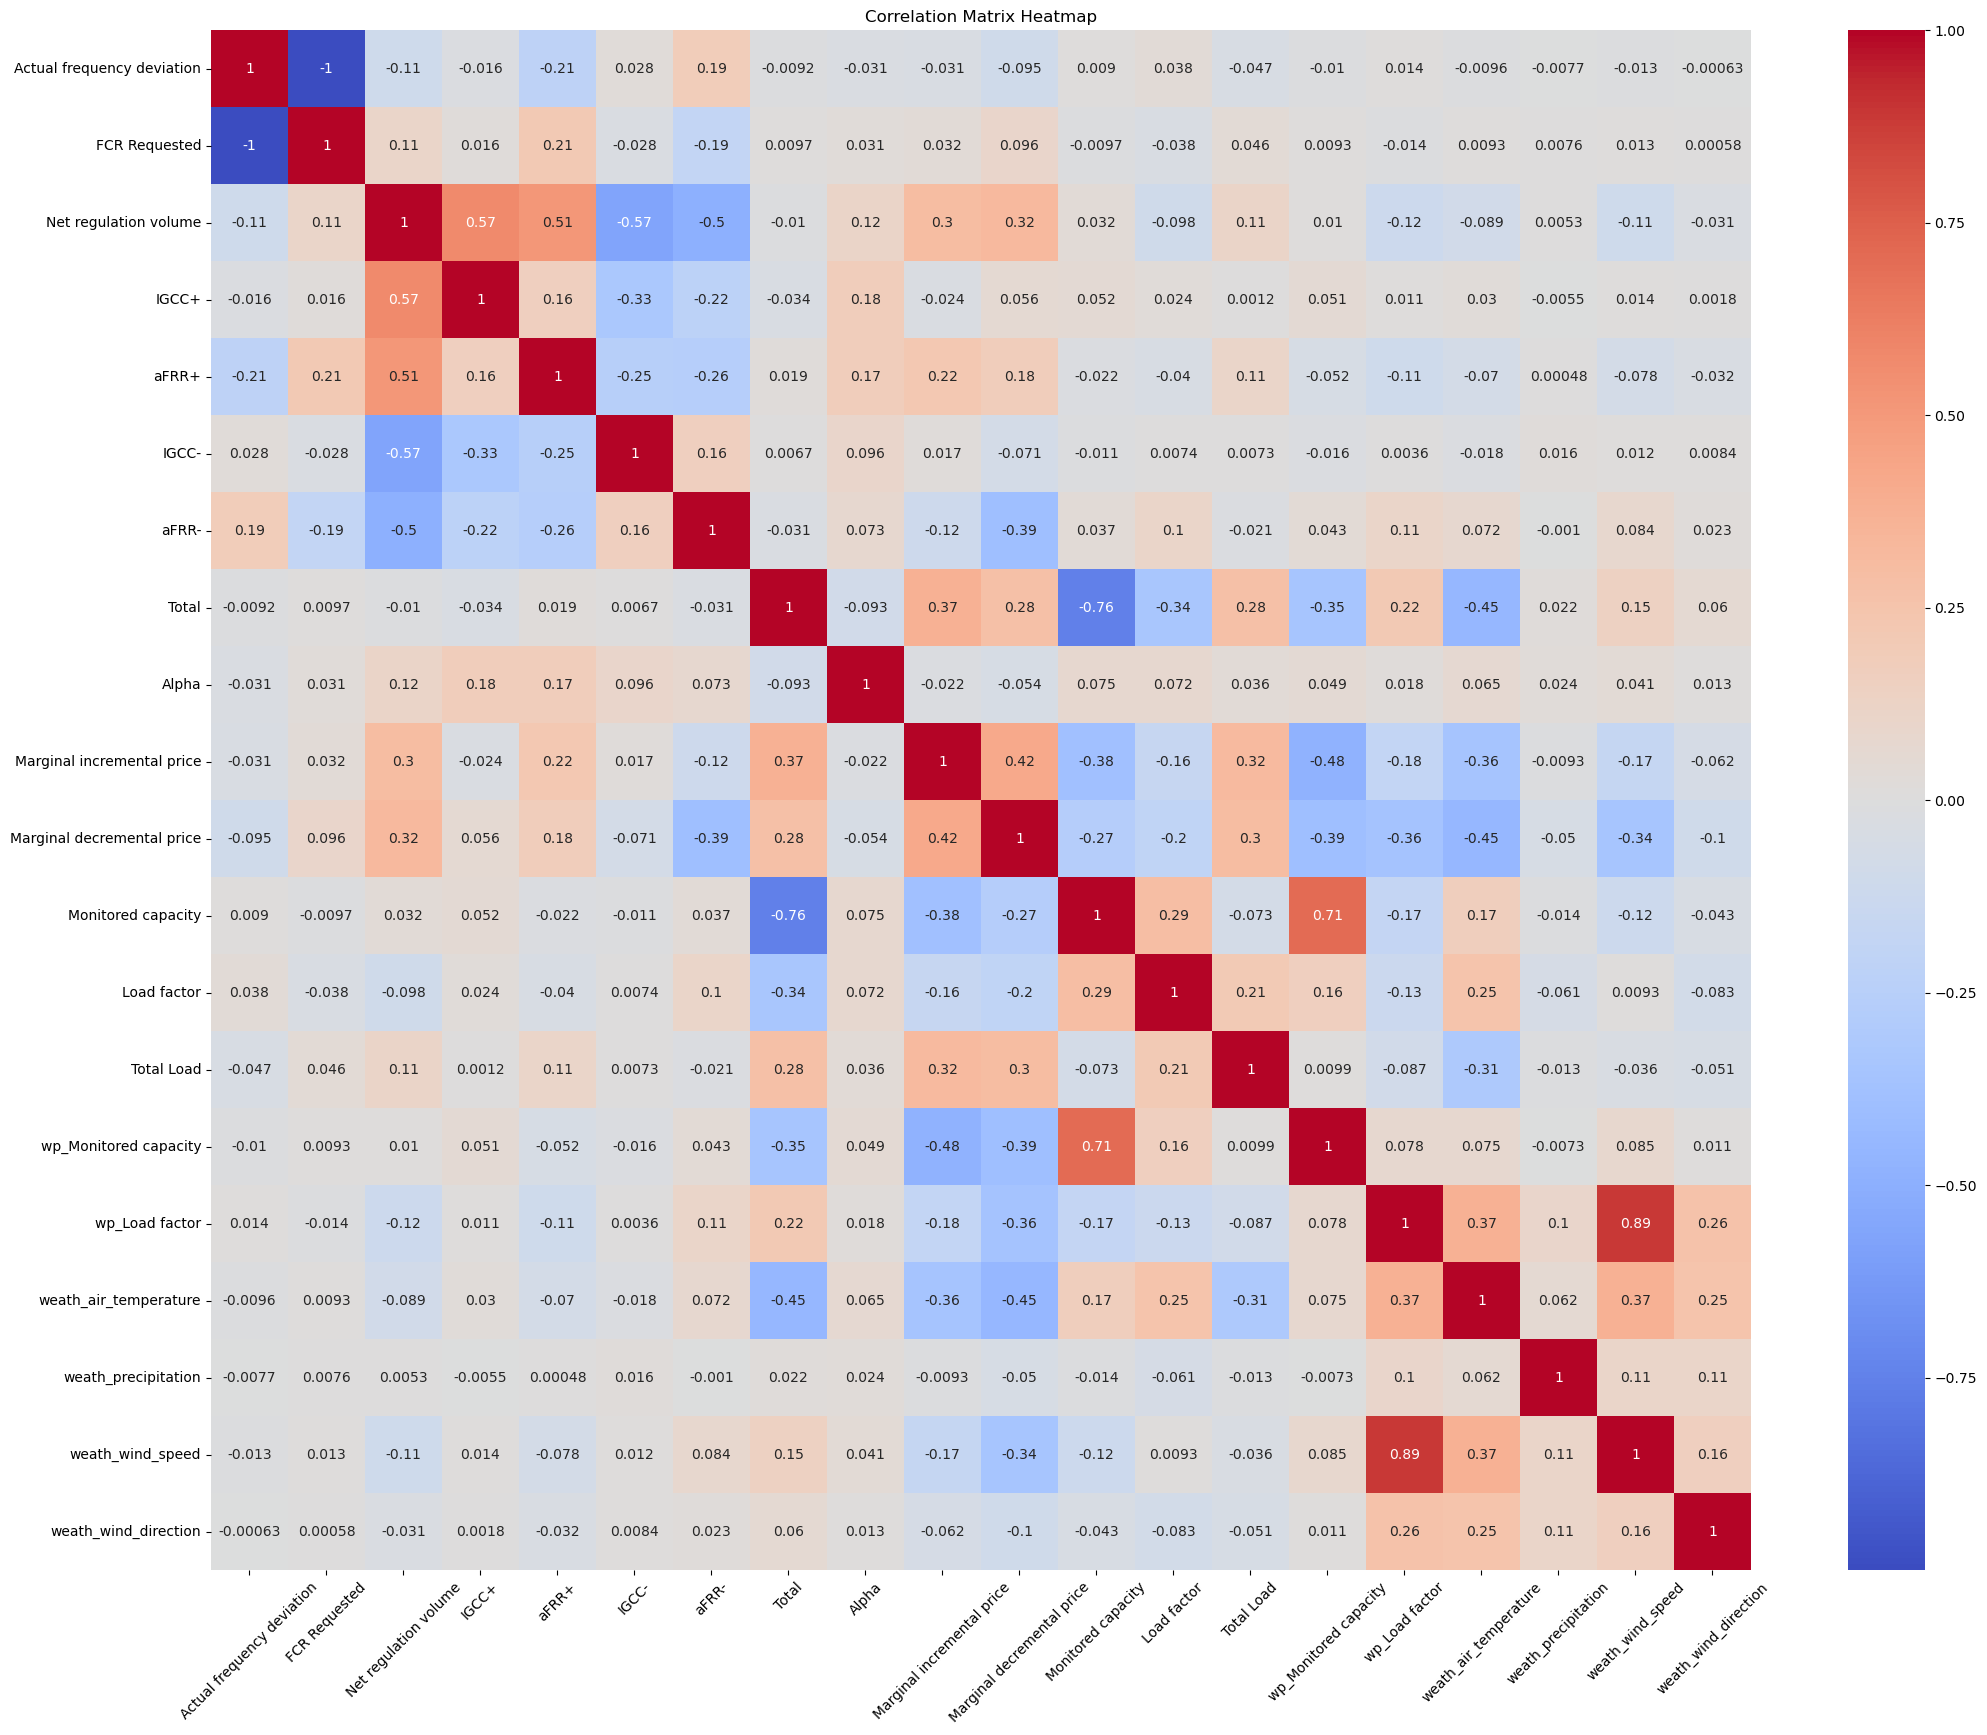

In [227]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the heatmap
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the heatmap
plt.show()

Based on the correlation matrix (heatmap) we can drop the following variables: FCR requested - perfect predictor, both load factors, net regulation volume and total

In [228]:
# Drop the 'FCR Requested', 'Load factor', 'wp_Load factor', 'Net regulation volume', and 'Total' columns
df = df.drop(['FCR Requested', 'Load factor', 'wp_Load factor', 'Net regulation volume', 'Total'], axis=1)

In [229]:
# Drop the montitored capacity column
df = df.drop(['Monitored capacity', 'wp_Monitored capacity'], axis=1)

In [230]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actual frequency deviation,18044.0,0.001593,0.020458,-0.125,-0.013000,0.00300,0.01600,0.095
IGCC+,18044.0,36.672182,65.314898,0.000,0.000000,3.40650,46.65700,718.871
aFRR+,18044.0,17.048799,31.984912,0.000,0.000000,0.56750,15.54775,204.527
IGCC-,18044.0,40.094627,67.613132,0.000,0.000000,6.53550,54.10975,861.426
aFRR-,18044.0,20.008043,40.560677,0.000,0.000000,0.75200,18.41650,382.141
Alpha,18044.0,3.227815,12.035654,0.000,0.000000,0.00000,1.64000,200.000
Marginal incremental price,18044.0,233.648623,129.606975,-50.000,156.160000,202.07500,272.48000,3455.720
Marginal decremental price,18044.0,49.597304,90.234822,-575.670,-3.940000,70.00000,81.92000,238.200
Total Load,18044.0,9518.036995,1283.401436,6143.480,8518.342500,9545.68000,10527.03000,12662.000
weath_air_temperature,18044.0,6.828252,4.026245,-5.025,4.124375,7.38875,9.58750,22.265


# Distribution check

In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [222]:
# Custom scaler function

min_val = 0
max_val = 1

def scale_dataframes(train_df, test_df, val_df, min_val, max_val):
    scaled_train_df = scale_dataframe(train_df, min_val, max_val)
    scaled_test_df = scale_dataframe(test_df, min_val, max_val)
    scaled_val_df = scale_dataframe(val_df, min_val, max_val)

    return scaled_train_df, scaled_test_df, scaled_val_df

def scale_dataframe(df, min_val, max_val):
    scaled_df = pd.DataFrame()

    for column in df.columns:
        min_val_col = df[column].min()
        max_val_col = df[column].max()
        scaled_col = ((df[column] - min_val_col) / (max_val_col - min_val_col)) * (max_val - min_val) + min_val
        scaled_df[column] = scaled_col

    return scaled_df
    

In [223]:
scaled_df = scale_dataframe(df, min_val, max_val)

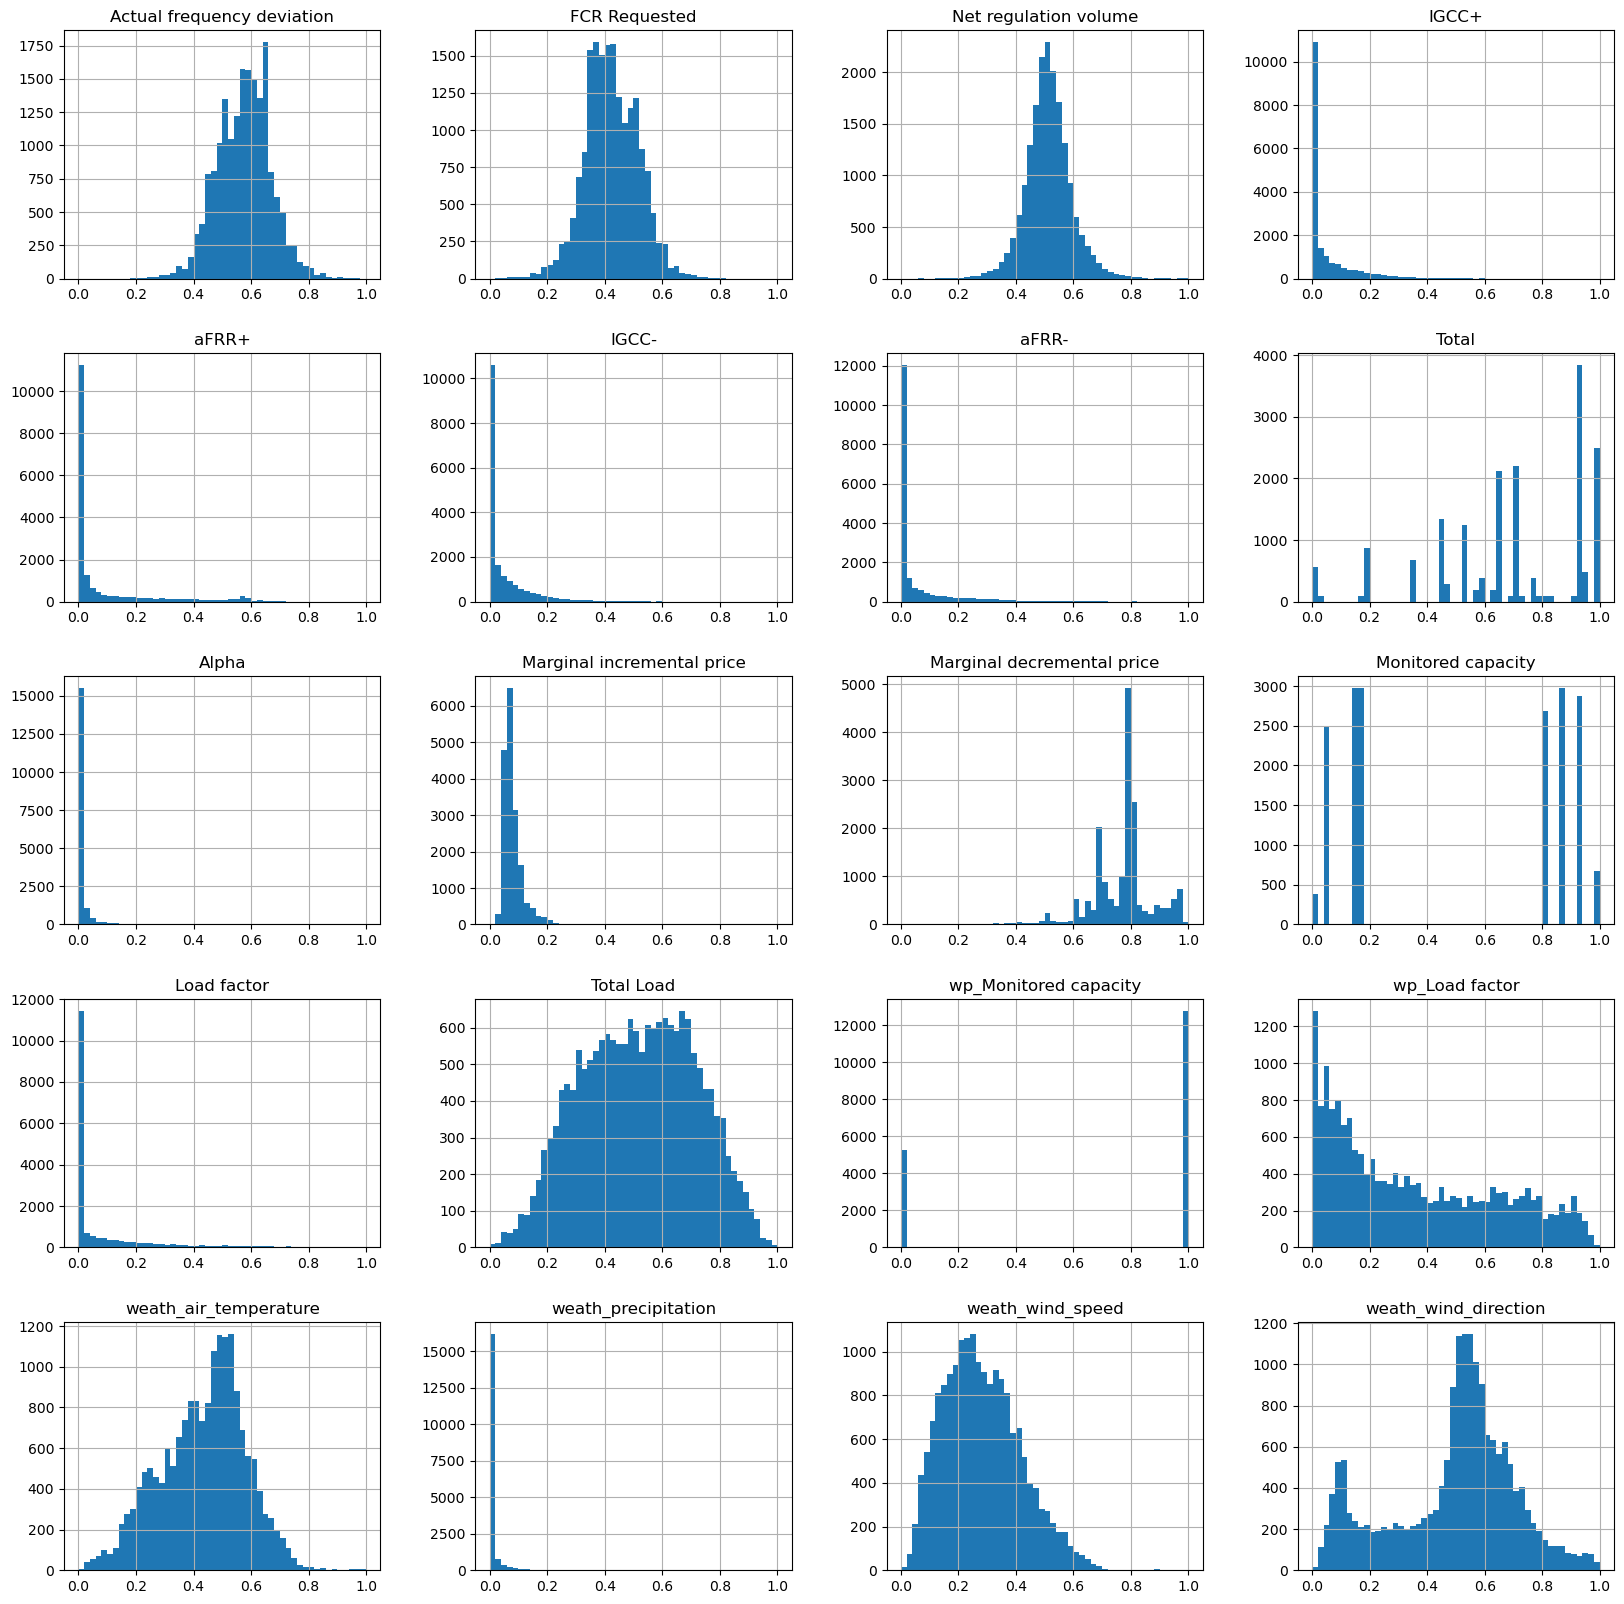

In [224]:
# Check the distribution of each column in the dataframe
scaled_df.hist(figsize=(20, 20), bins=50)
plt.show()


In [225]:
# Show the entries for wp_Monitored capacity column
scaled_df['wp_Monitored capacity']

Datetime
2022-10-31 23:00:00    5.320549e-15
2022-10-31 23:15:00    0.000000e+00
2022-10-31 23:30:00    5.320549e-15
2022-10-31 23:45:00    5.320549e-15
2022-11-01 00:00:00    5.320549e-15
                           ...     
2023-05-07 20:45:00    1.000000e+00
2023-05-07 21:00:00    1.000000e+00
2023-05-07 21:15:00    1.000000e+00
2023-05-07 21:30:00    1.000000e+00
2023-05-07 21:45:00    1.000000e+00
Name: wp_Monitored capacity, Length: 18044, dtype: float64